In [956]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats 
import seaborn as sns
 

sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore')

print('setup')

setup


In [957]:
df = pd.read_csv('test.csv', low_memory=False)

In [958]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

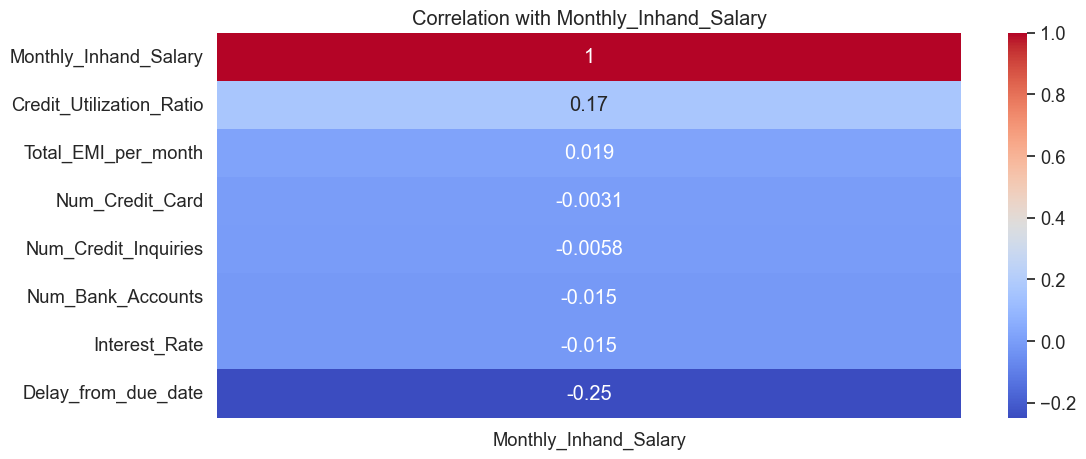

In [959]:
corr_df = df.corr(method='pearson', numeric_only=True)[['Monthly_Inhand_Salary']].sort_values('Monthly_Inhand_Salary', ascending=False)


fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation with Monthly_Inhand_Salary")
plt.show()

In [960]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

((50000, 27), None)

In [961]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [962]:
df.duplicated().sum()

0

<AxesSubplot: xlabel='Month', ylabel='count'>

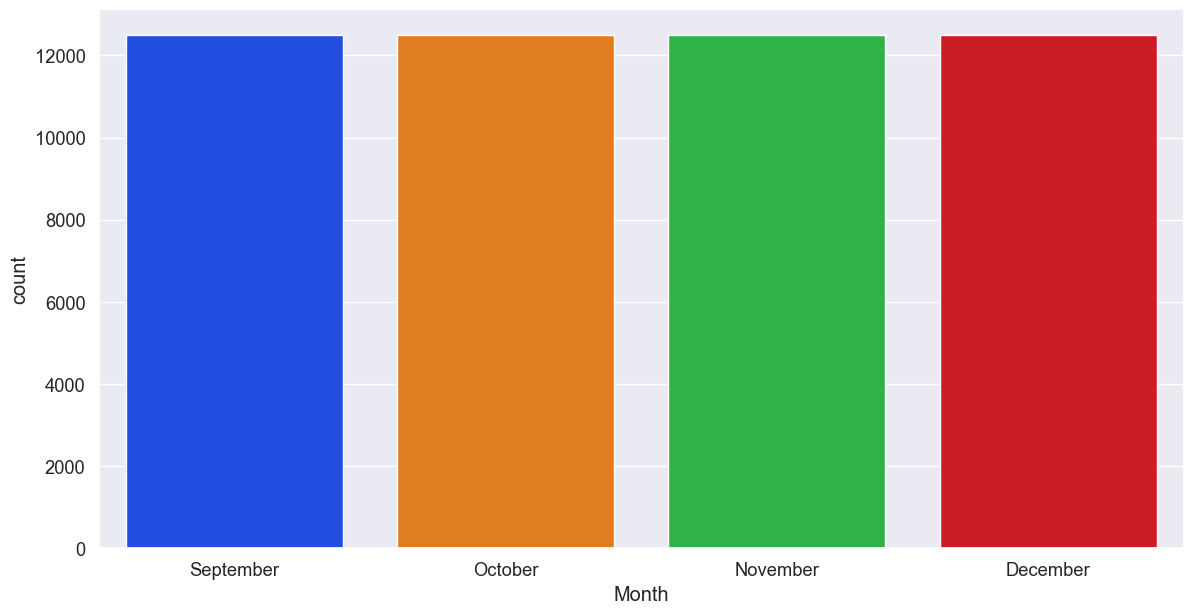

In [963]:
sns.countplot(x='Month', data=df, palette="bright")

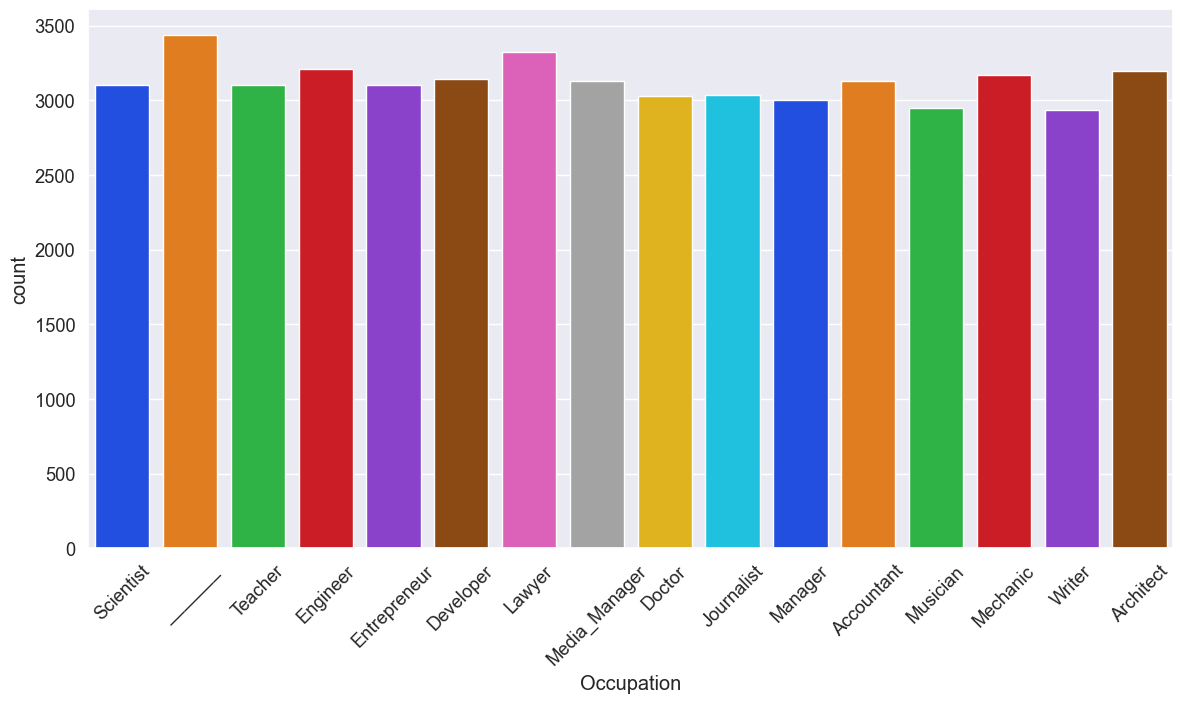

In [964]:
sns.countplot(x='Occupation', data=df, palette="bright");
plt.xticks(rotation=45);

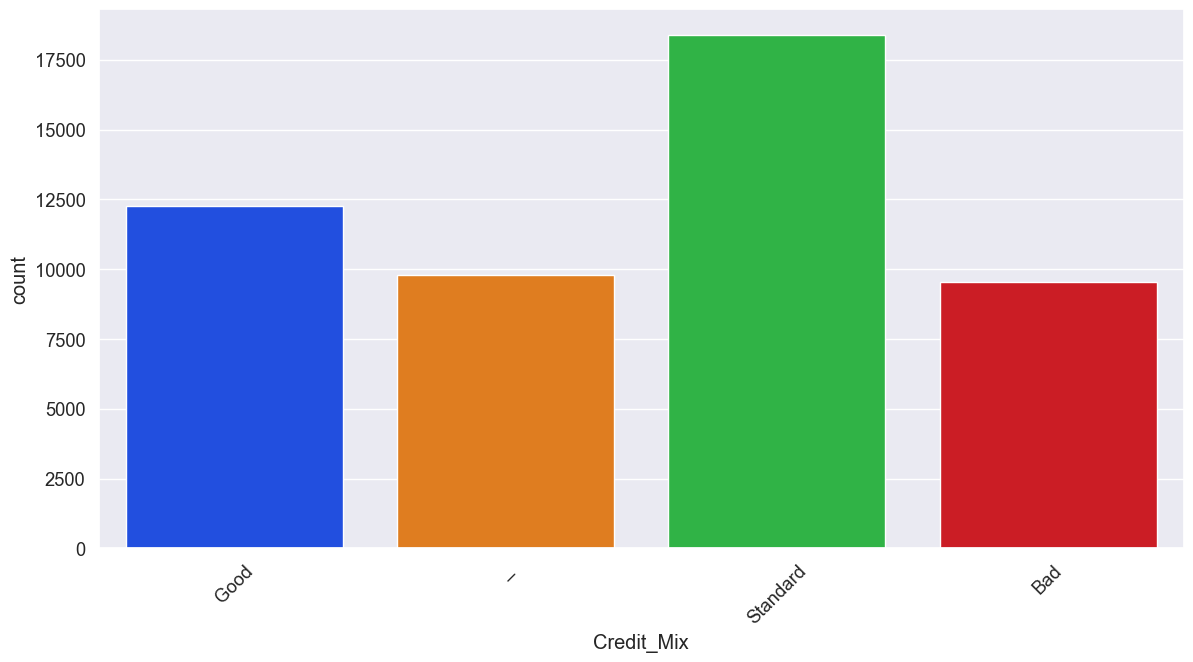

In [965]:
sns.countplot(x ='Credit_Mix', data= df ,palette="bright");
plt.xticks(rotation=45);

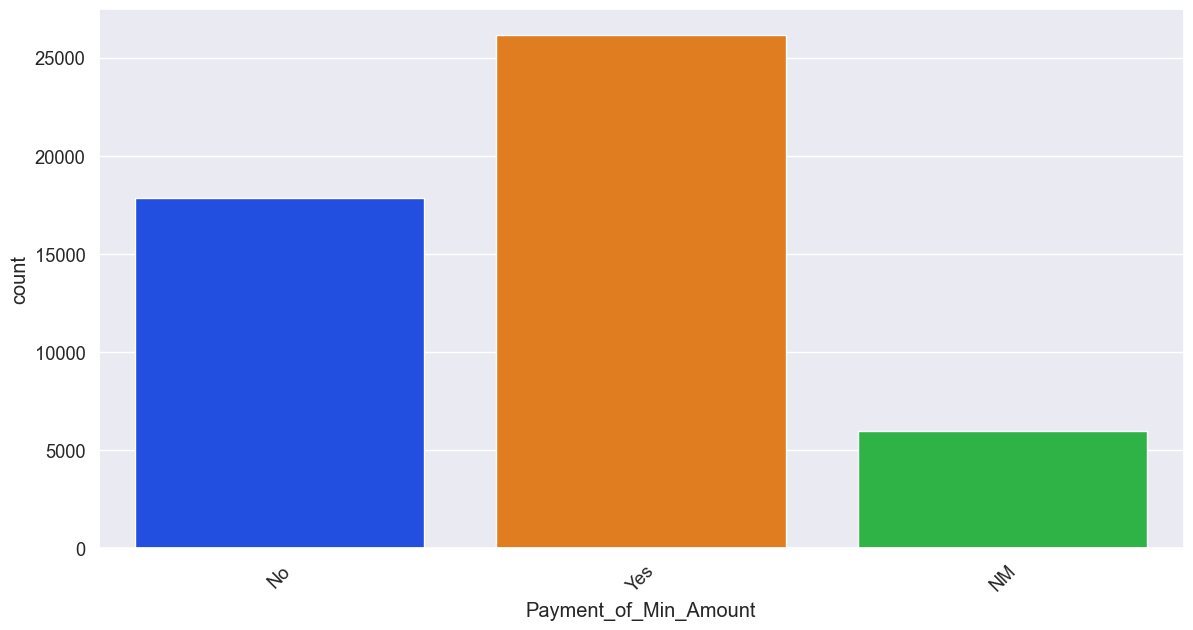

In [966]:
sns.countplot(x ='Payment_of_Min_Amount', data= df ,palette="bright");
plt.xticks(rotation=45);

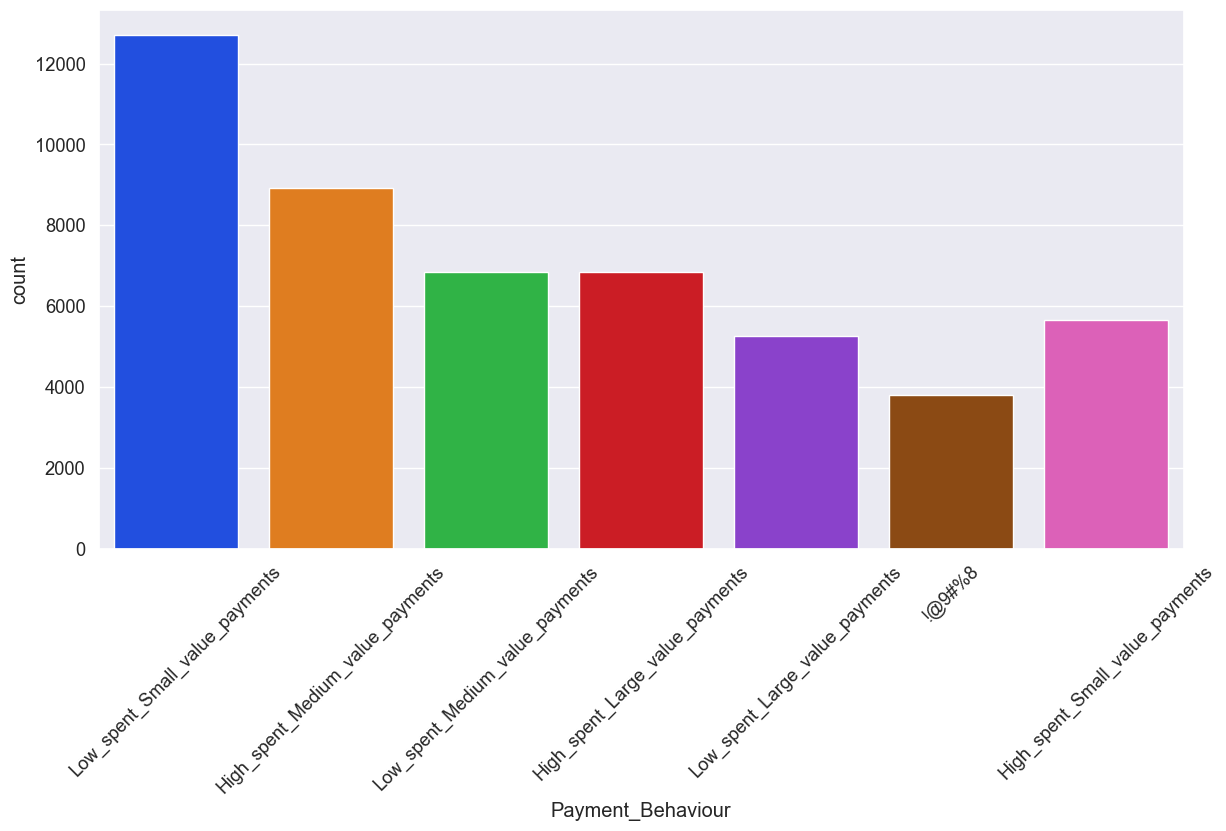

In [967]:
sns.countplot(x ='Payment_Behaviour', data= df ,palette="bright");
plt.xticks(rotation=45);

In [968]:
df['Type_of_Loan'].value_counts().head(10)

Not Specified                      704
Credit-Builder Loan                640
Personal Loan                      636
Debt Consolidation Loan            632
Student Loan                       620
Payday Loan                        600
Mortgage Loan                      588
Auto Loan                          576
Home Equity Loan                   568
Personal Loan, and Student Loan    160
Name: Type_of_Loan, dtype: int64

In [969]:
def dirty_data(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

In [970]:
dirty_data(df)

,column,dtype,nunique,null,duplicates
0,ID,object,50000,0,0
1,Customer_ID,object,12500,0,37500
2,Month,object,4,0,49996
3,Name,object,10139,5015,39860
4,Age,object,976,0,49024
5,SSN,object,12501,0,37499
6,Occupation,object,16,0,49984
7,Annual_Income,object,16121,0,33879
8,Monthly_Inhand_Salary,float64,12793,7498,37206
9,Num_Bank_Accounts,int64,540,0,49460


<br>
<br>

# Data cleaning

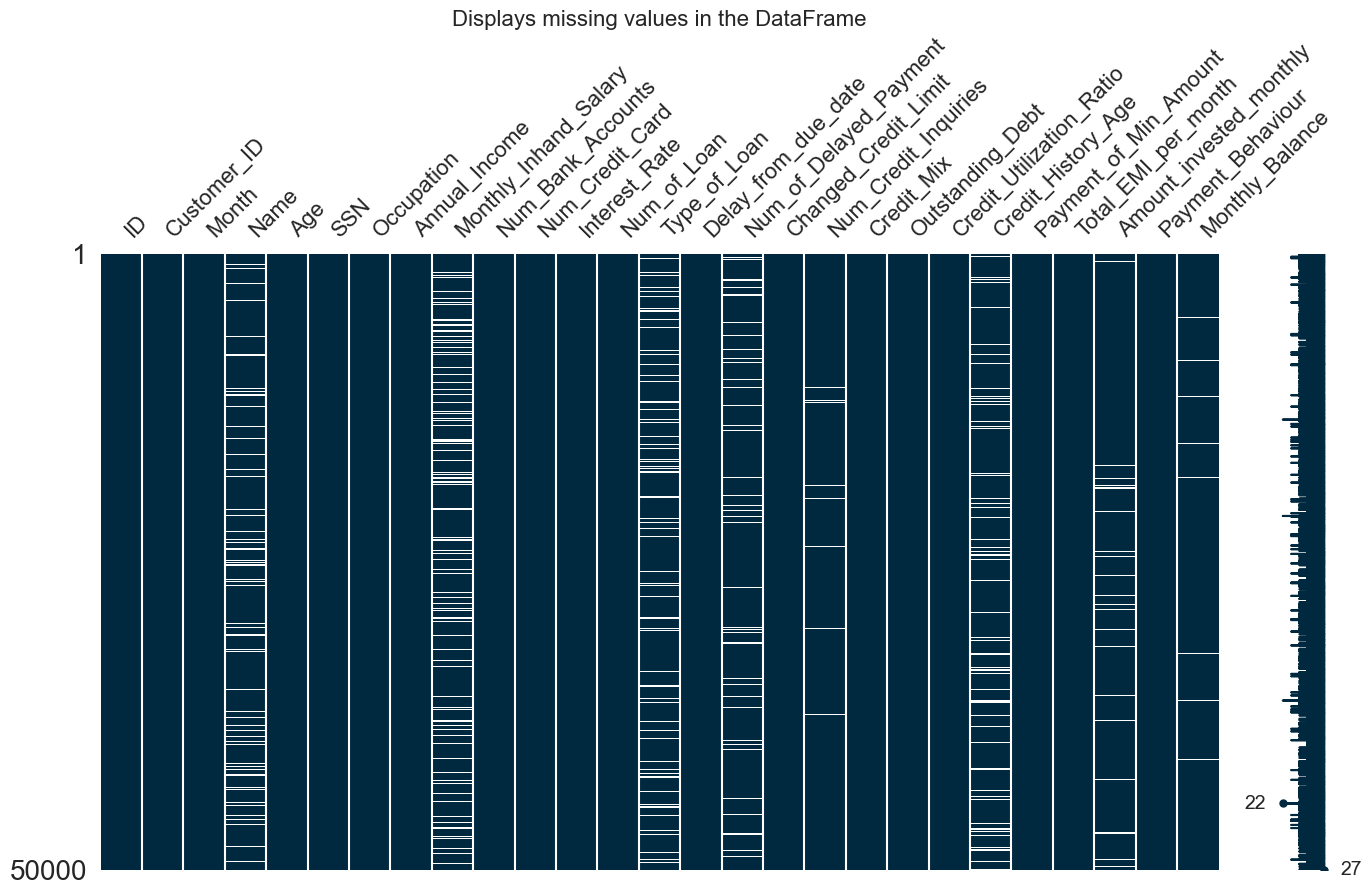

,column,dtype,nunique,null,duplicates
0,ID,object,50000,0,0
1,Customer_ID,object,12500,0,37500
2,Month,object,4,0,49996
3,Name,object,10139,5015,39860
4,Age,object,976,0,49024
5,SSN,object,12501,0,37499
6,Occupation,object,16,0,49984
7,Annual_Income,object,16121,0,33879
8,Monthly_Inhand_Salary,float64,12793,7498,37206
9,Num_Bank_Accounts,int64,540,0,49460


In [971]:
import missingno as msno

msno.matrix(df, figsize=(16, 8), color = (0.0, 0.16, 0.25))
plt.title('Displays missing values in the DataFrame', fontsize=16)
plt.show()

dirty_data(df)

# Cleaning Age

In [972]:
df['Age'] = df['Age'].map(lambda x: str(x).strip('_ ,"'))
df['Age'] = df['Age'].astype('int64')
df['Age'].dtypes

dtype('int64')

In [973]:
list_of_ages = df.groupby('Customer_ID')['Age'].apply(list)
x, y = list_of_ages.apply(lambda x: stats.mode(x, keepdims=True)).apply([min, max])
mini, maxi = x[0][0], y[0][0]

In [974]:
#create a temp column and assign NaN to every value less than 14 or bigger than 56
temp_age_column = df['Age'].transform(lambda x: np.NaN if ((x<14)|(x>56)) else x)

In [975]:
# fill the all the ages of each customer ID with the local mode for all values, if its empty then fill it with NaN
mode_by_group = df.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
result = temp_age_column.fillna(mode_by_group)
df['Age']=result
counts =df['Month'].value_counts()
counts

September    12500
October      12500
November     12500
December     12500
Name: Month, dtype: int64

<br>
<br>
# Occupation cleaned up

In [976]:
Occupation = df['Occupation'].value_counts()
Occupation

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64

In [977]:
df['Occupation'] = df['Occupation'].map(lambda x: str(x).strip('_'))
df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(lambda x: x.mode()[0]) 
Occupation =df['Occupation'].value_counts()
Occupation

Lawyer           3452
Engineer         3352
Architect        3328
Media_Manager    3292
Scientist        3288
Mechanic         3284
Accountant       3264
Developer        3260
Teacher          3256
Entrepreneur     3244
Doctor           3184
Journalist       3172
Manager          3152
Musician         3096
Writer           3072
                 1304
Name: Occupation, dtype: int64

In [978]:
df['Occupation'].replace('', 'Unkown', inplace=True)
Occupation = df['Occupation'].value_counts()
Occupation

Lawyer           3452
Engineer         3352
Architect        3328
Media_Manager    3292
Scientist        3288
Mechanic         3284
Accountant       3264
Developer        3260
Teacher          3256
Entrepreneur     3244
Doctor           3184
Journalist       3172
Manager          3152
Musician         3096
Writer           3072
Unkown           1304
Name: Occupation, dtype: int64

In [979]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'].replace('[^\d.]', '', regex=True))


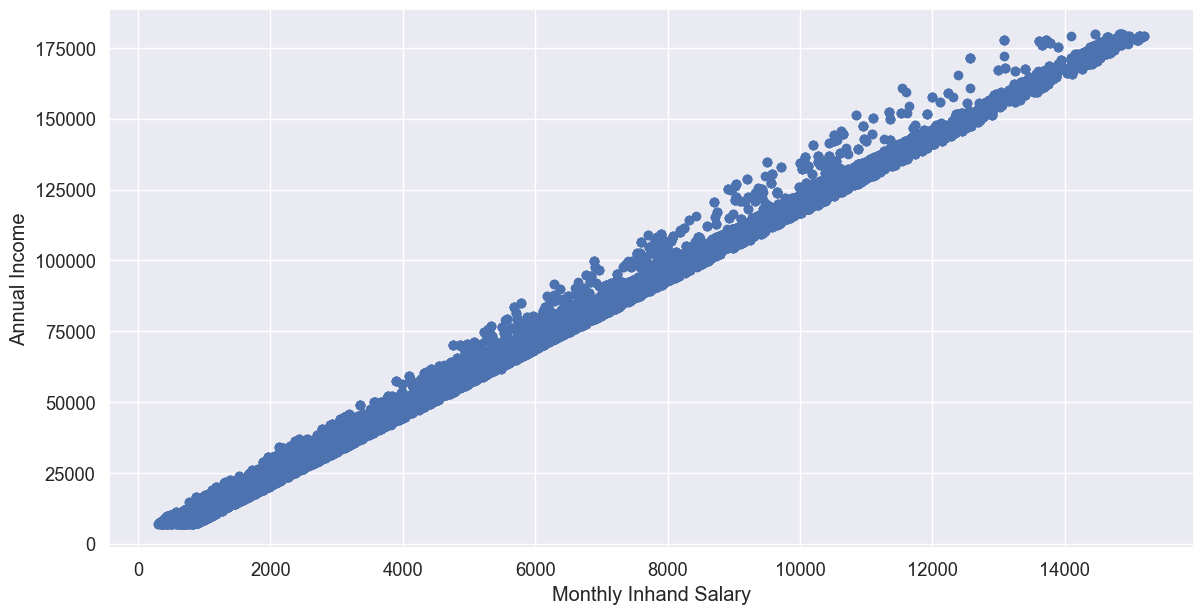

In [980]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for annual incomes less than 100k
df_filtered = df[df['Annual_Income'] < 180000]

# Plot a scatter plot of Monthly_Inhand_Salary against Annual_Income
plt.scatter(df_filtered['Monthly_Inhand_Salary'], df_filtered['Annual_Income'])
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Annual Income')
plt.show()

In [981]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x[:-1] if not x[-1].isdigit() else x)

In [982]:
# Assuming the column name is 'Num_of_Loan'
num_loan = df['Num_of_Loan']

# Convert to numeric
num_loan_numeric = pd.to_numeric(num_loan, errors='coerce')

df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')


# Check how many rows are numeric
print('Number of numeric rows:', num_loan_numeric.notnull().sum())

print(df['Num_of_Loan'].describe())


Number of numeric rows: 50000
count    50000.000000
mean         3.403360
std         66.364023
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64


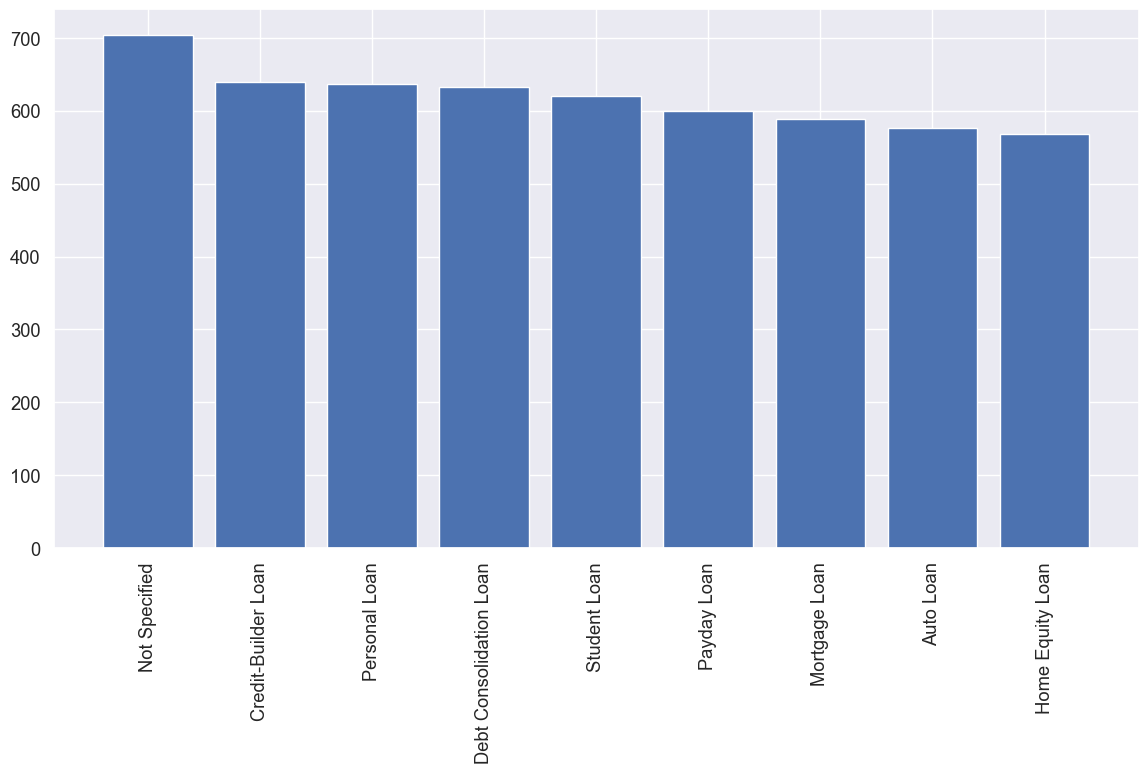

In [983]:
value_counts = df['Type_of_Loan'].value_counts()
value_counts_filtered = value_counts[value_counts > 240]

plt.bar(value_counts_filtered.index, value_counts_filtered.values)
plt.xticks(rotation=90)
plt.show()

In [984]:
value= df['Num_of_Loan'].median()
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(value)

# Count number of elements separated by comma
num_elements = df['Type_of_Loan'].astype(str).apply(lambda x: x.count(',') + 1 if x!= 'Not Specified'  else 0)

# Create new column
df = df.assign(Num_of_Loan_Types=num_elements)

# Replace the values in the specified rows with Num_of_Loan_Types cloumn value
df.loc[(df['Num_of_Loan'] > 9) | (df['Num_of_Loan'] < 0), 'Num_of_Loan'] = df['Num_of_Loan_Types']
print(df[(df['Num_of_Loan'] > 9) | (df['Num_of_Loan'] < 0)])


# Check the correlation between the two columns
corr = df['Num_of_Loan'].corr(df['Num_of_Loan_Types'])

print('Correlation between Num_of_Loan and Num_of_Loan_Types_int:', corr)
df['Num_of_Loan'].describe()

Empty DataFrame
Columns: [ID, Customer_ID, Month, Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Num_of_Loan_Types]
Index: []

[0 rows x 28 columns]
Correlation between Num_of_Loan and Num_of_Loan_Types_int: 0.9913374977538296


count    50000.000000
mean         3.537440
std          2.440704
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: Num_of_Loan, dtype: float64

In [985]:
(df["Credit_Mix"].unique())
(df.groupby("Credit_Mix").mean(numeric_only=True))
df[df["Credit_Mix"]=='_']["Credit_Mix"].count()

9805

In [986]:
# create a dictionary to map the string values to integer values
score_map = {'Bad': 0, 'Standard': 1, '_':2, 'Good': 3}

# replace the string values with integer values using the map
df['Credit_Mix'] = df['Credit_Mix'].replace(score_map)
df['Credit_Mix'].unique()

array([3, 2, 1, 0], dtype=int64)

In [987]:
df_c = df[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio']]

def dirty_data(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

def cleaning_Null_columns(df_column):
  df_column.fillna(-99999, inplace = True)
  return df_column.value_counts(dropna = False)

def fix_nums(num):
    try : 
        return float(num.replace("_",""))
    except :
        return np.NaN
 

        
def plot_boxplots(df, ncols=3, color="", figsize=(10, 10)):
    try :
        # Calculate number of rows and columns
        nrows = (len(df.columns) - 1) // ncols + 1
        
        # Create figure and subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        
        # Loop through columns and plot boxplot
        for i, column in enumerate(df.columns):
            ax = axes.flat[i]
            sns.boxplot(df[column], ax=ax, color=color, whis=1.5, saturation=0.5, width=0.5, orient='h', notch=True, showcaps=False)
            ax.axvline(df[column].median(), color='r', linestyle='--')
            ax.set_title(column)
            ax.legend([f'Median: {df[column].median():.2f}'], loc='best')
        
        for ax in axes.flat:
            ax.grid(True)
        
        # Remove any unused axes
        if len(df.columns) % ncols != 0:
            for i in range(len(df.columns) % ncols, ncols):
                fig.delaxes(axes.flat[-i])
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        
        
def process_column(df_column):
    try:
        # Calculate the 95 percentile
        q95 = df_test[df_column.name].quantile(0.95)

        # Replace values above the 95 percentile with the median value
        df_test_test = df_test[df_test[df_column.name] <= q95][df_column.name]
        median_col = int(df_test_test.median())

        df_test.loc[df_test[df_column.name] > q95, df_column.name] = median_col
        df_test.loc[df_test[df_column.name] == -99999, df_column.name] = median_col  
        
    except Exception as e:
        print(f"Error: {e}")      


def df_process_data(df):
    try:
        processed = []
        columns = df.columns
        for col in columns:
            # Check for outliers and replace with median
            q95 = df[col].quantile(0.95).round(1)
            df_test = df[df[col] <= q95][col]
            median_col = int(df_test.median())
            df.loc[df[col] > q95, col] = median_col
            df.loc[df[col] == -99999, col] = median_col
            processed.append([col,q95,median_col])
        df_processed_data_finding = pd.DataFrame(processed, columns=['column','quantile95','median_col'])
        return df_processed_data_finding
    except Exception as e:
        print(f"Error: {e}")

In [988]:
num_to_fix = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']

for col in num_to_fix:
    df[col] = df[col].apply(fix_nums)

cleaning_Null_columns(df['Num_of_Delayed_Payment'])
cleaning_Null_columns(df['Changed_Credit_Limit'])
cleaning_Null_columns(df['Num_Credit_Inquiries'])

df_c = df[['Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio']]

dirty_data(df_c)

,column,dtype,nunique,null,duplicates
0,Delay_from_due_date,int64,73,0,49927
1,Num_of_Delayed_Payment,float64,412,0,49588
2,Changed_Credit_Limit,float64,3927,0,46073
3,Num_Credit_Inquiries,float64,751,0,49249
4,Outstanding_Debt,float64,12203,0,37797
5,Credit_Utilization_Ratio,float64,50000,0,0


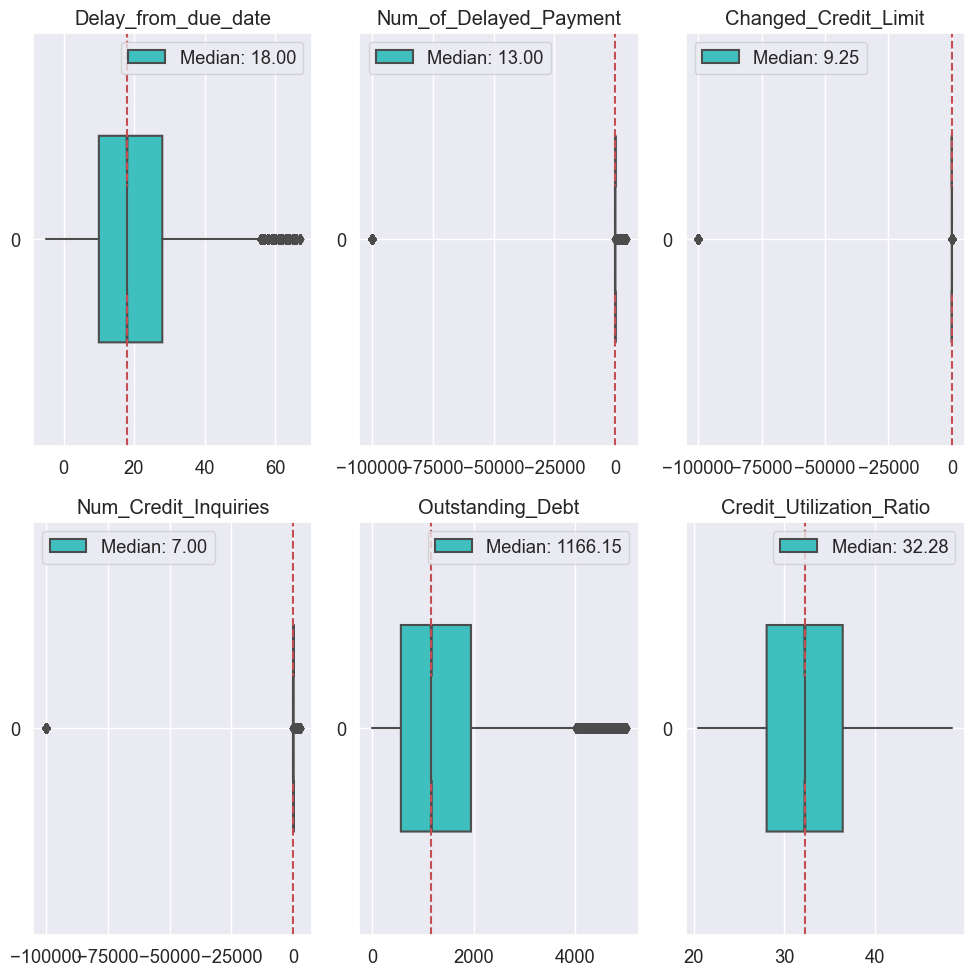

In [989]:
plot_boxplots(df_c,  ncols=3, color='cyan')

In [990]:
df_c.apply(process_column)
df_process_data(df_c)

Error: unsupported operand type(s) for -: 'str' and 'str'
Error: unsupported operand type(s) for -: 'str' and 'str'
Error: unsupported operand type(s) for -: 'str' and 'str'


,column,quantile95,median_col
0,Delay_from_due_date,54.0,17
1,Num_of_Delayed_Payment,23.0,12
2,Changed_Credit_Limit,23.4,8
3,Num_Credit_Inquiries,15.0,7
4,Outstanding_Debt,4073.8,1103
5,Credit_Utilization_Ratio,40.2,31


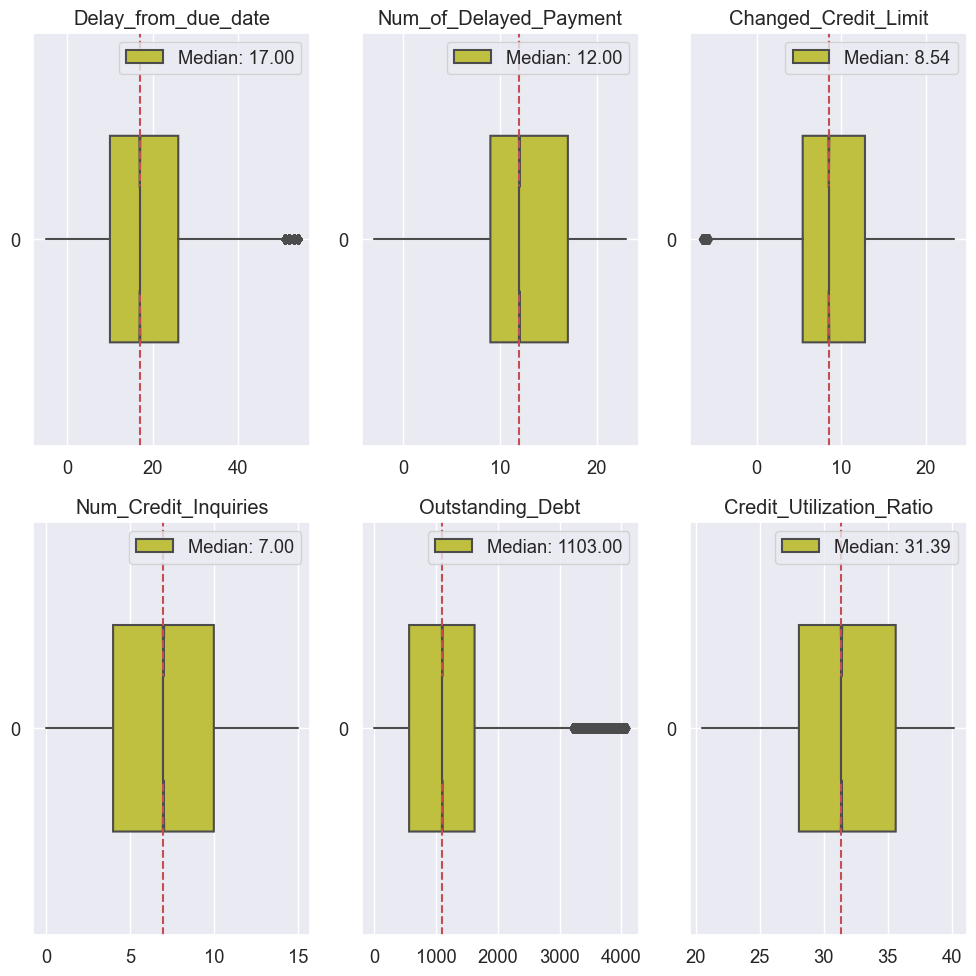

In [991]:
plot_boxplots(df_c,  ncols=3, color='yellow')

In [992]:
# Credit_History_Age : A = years and B = months => 12 * A + B
def convert_credit_history_age(history_age):
    if str(history_age) == 'nan':
        return np.NaN
    else:
        years = int(history_age.split(' ')[0])
        months = int(history_age.split(' ')[3])
        return 12 * years + months

In [993]:
# Payment_Behaviour : split into 'spent' and 'value'
def convert_payment_behaviour(behaviour, split_name):
    try:
        if split_name == 'spent':
            return behaviour.split('_')[0]
        elif split_name == 'value':
            return behaviour.split('_')[2]
        else:
            return np.NaN
    except:
        return np.NaN

In [994]:
# convert columns
for df in [df]:
    
    df['Credit_History_Age'] = df['Credit_History_Age'].apply(
        lambda x: convert_credit_history_age(x)
    )
    df['Payment_Behaviour_Spent'] = df['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'spent')
    )
    df['Payment_Behaviour_Value'] = df['Payment_Behaviour'].apply(
        lambda x: convert_payment_behaviour(x, 'value')
    )
    
    
df = df.drop(columns=['Payment_Behaviour'])

In [995]:
# Fix error values in some numeric columns
def convert_to_int(string):
    try:
        return int(str(string).replace('_', ''))
    except:
        return np.NaN
    
def convert_to_float(string):
    try:
        return float(str(string).replace('_', ''))
    except:
        return np.NaN

In [996]:
# int/float : for how to remove '_'
# fixed/var : for how to replace error values (using replacing with same-customer-indicating values or not)
float_fixed = ['Total_EMI_per_month']
float_var = ['Amount_invested_monthly', 'Monthly_Balance']

# remove '_' to convert to int or float
for data in [df]:
    float_col_with_str = float_fixed + float_var
    for float_col in float_col_with_str:
        data[float_col] = data[float_col].apply(lambda x: convert_to_float(x))


In [997]:
# Amount_invested_monthly, Monthly_Balance -> Fill null (None / NaN) values with median 

# Amount_invested_monthly : NaN -> str(NaN)
for col in ['Amount_invested_monthly', 'Monthly_Balance']:
    
    df[col] = df[col].apply(
        lambda x: x if (pd.notnull(x) and convert_to_float(x) != 'NaN') else 'NaN_float'
    )

In [998]:
def count_null_values(null_values, df):
    print('test data')
    for column in null_values.keys():
        value_counts_train = df[column].value_counts()

        if null_values[column] in value_counts_train:
            print('null values (' + null_values[column] + ') in column [' + column + '] : ' + str(value_counts_train[null_values[column]]))
        else:
            print('null values (' + null_values[column] + ') in column [' + column + '] : 0')
        
    print('\ntest data')
    for column in null_values.keys():
        value_counts_test  = df[column].value_counts()

        if null_values[column] in value_counts_test:
            print('null values (' + null_values[column] + ') in column [' + column + '] : ' + str(value_counts_test[null_values[column]]))
        else:
            print('null values (' + null_values[column] + ') in column [' + column + '] : 0')
null_values = {
    'Amount_invested_monthly': 'NaN_float', 'Monthly_Balance': 'NaN_float',
    'Credit_History_Age': 'nan', 'Payment_Behaviour_Value': 'nan',
    'Payment_Behaviour_Spent': '!@9#%8'
}

count_null_values(null_values, df)

test data
null values (NaN_float) in column [Amount_invested_monthly] : 2271
null values (NaN_float) in column [Monthly_Balance] : 562
null values (nan) in column [Credit_History_Age] : 0
null values (nan) in column [Payment_Behaviour_Value] : 0
null values (!@9#%8) in column [Payment_Behaviour_Spent] : 3800

test data
null values (NaN_float) in column [Amount_invested_monthly] : 2271
null values (NaN_float) in column [Monthly_Balance] : 562
null values (nan) in column [Credit_History_Age] : 0
null values (nan) in column [Payment_Behaviour_Value] : 0
null values (!@9#%8) in column [Payment_Behaviour_Spent] : 3800


In [999]:
# fill with the median of the same customer
def replace_with_median(value, idx, data_arr, rows_per_customer, null_value, is_round = False):
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]
    
    values = []
    fraction = -1
    for data_value in data_range:
        if data_value != null_value:
            values.append(float(data_value))
            fraction = float(data_value) % 1.0
    
    if len(values) == 0:
        return null_value
    else:
        result = np.nanmedian(values)
        
        if is_round:
            return result if abs(result % 1.0 - fraction) < 0.25 else result + 0.5
        else:
            return result

In [1000]:
for null_value_col in ['Amount_invested_monthly', 'Monthly_Balance']:
    
    df_np = []
    test_data_np  = []

    len_Train = len(df)
   

    for i in range(len_Train):
        df_np.append(
            replace_with_median(
                df[null_value_col].iloc[i], i, df[null_value_col], 8, null_values[null_value_col]
            )
        )

    
    df[null_value_col] = pd.Series(df_np)

In [1001]:
def fill_month_count_column(value, idx, data_arr, rows_per_customer, null_value):
    
    # Normal values that are not null are treated as is.
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer + 1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]

    # For the same customer, as in [300, 301, 302, 303, 304, 305, 306, 307], 
    # the value increases by 1 whenever the index increases by 1
    first_valid_value = None
    for value_idx in range(rows_per_customer):
        if data_arr[value_idx] != null_value:
            first_valid_value = [value_idx - start_idx, data_arr[value_idx]]
            break
    if first_valid_value == None:
        return null_value
    else:
        return first_valid_value[1] + (idx % rows_per_customer)
# Fill in null values for the Credit_History_Age column 
# using other records from the same customer
df_np = []
test_data_np  = []
col = 'Credit_History_Age'
    
for i in range(len_Train):
    df_np.append(
        fill_month_count_column(df[col].iloc[i], i, df[col], 8, null_values[col])
    )
    

    
df[col] = pd.Series(df_np)


In [1002]:
# In order to process Payment_Behaviour_Spent and Payment_Behaviour_Value columns, 
# the number of High and Low values in training and test data is first identified.
# pb = payment behaviour
train_pb_spent = df['Payment_Behaviour_Spent'].value_counts()
train_pb_value = df['Payment_Behaviour_Value'].value_counts()

print('Payment-Behaviour-Spent in train data :', train_pb_spent)
print('\nPayment-Behaviour-Value in train data :', train_pb_value)

Payment-Behaviour-Spent in train data : Low       24783
High      21417
!@9#%8     3800
Name: Payment_Behaviour_Spent, dtype: int64

Payment-Behaviour-Value in train data : Small     18345
Medium    15759
Large     12096
Name: Payment_Behaviour_Value, dtype: int64


In [1003]:
# Payment_Behaviour_Spent: If there are more lows or the same frequency of occurrence among the records of the same customer, it is treated as low, and if there are more highs, it is treated as high.
# Payment_Behaviour_Value: Processed as the highest among the records of the same customer, but if there are items with the same frequency of occurrence, they are processed in order of Small, Medium, and Large.

# Function to fill categorical column
def fill_categorical_column(value, idx, data_arr, rows_per_customer, null_value, pb_count):

    # Normal values that are not null are treated as is.
    if value != null_value:
        return value
    
    start_idx = (idx // rows_per_customer) * rows_per_customer
    end_idx = (idx // rows_per_customer +1) * rows_per_customer
    data_range = data_arr[start_idx:end_idx]

    pb_count_copied = pb_count.copy()
    for data_value in data_range:
        pb_count_copied[data_value][1] += 1

    # Priority: Number of appearances by the same customer > Sort by number of appearances
    is_all_null = True
    pb_count_list_customer = []
    
    for cnt_key, cnt_value in pb_count_copied.items():
        pb_count_list_customer.append([cnt_key, cnt_value[0], cnt_value[1]])
        if cnt_key != null_value and cnt_value[1] > 0:
            is_all_null = False

    pb_count_list_customer.sort(key = lambda x: x[1], reverse = True) 
    pb_count_list_customer.sort(key = lambda x: x[2], reverse = True)

    if is_all_null:
        return null_value
    else:
        return pb_count_list_customer[0][0] # The most frequent value for that customer according to the priority you have sorted
    
# Fill in null values for the Payment_Behaviour_Spent column using other records for the same customer
cols_to_pb_count = {'Payment_Behaviour_Spent': train_pb_spent, 'Payment_Behaviour_Value': train_pb_value}
for col, pb_count in cols_to_pb_count.items():
    df_np = []
    test_data_np  = []

    pb_count_dict = {}
    for val, cnt in pb_count.items():
        pb_count_dict[val] = [cnt, 0]

    print('count of column ' + col + ': ', pb_count_dict)

    #  Fill in null values
    for i in range(len_Train):
        df_np.append(
            fill_categorical_column(df[col].iloc[i], i, df[col], 8, null_values[col], pb_count_dict)
        )

    df[col] = pd.Series(df_np)
    

count of column Payment_Behaviour_Spent:  {'Low': [24783, 0], 'High': [21417, 0], '!@9#%8': [3800, 0]}
count of column Payment_Behaviour_Value:  {'Small': [18345, 0], 'Medium': [15759, 0], 'Large': [12096, 0]}


In [1004]:
# There are some null values in monthly_balance
# Apply median value of all data
for median_col in ['Monthly_Balance']:
    arr_train = np.array(df[median_col])
    median_train = np.nanmedian(arr_train[~np.isnan(arr_train)])

    print('median of [' + median_col + '] :', median_train)

    for data in [df]:
        data[median_col] = np.where(data[median_col] == null_values[median_col], median_train, data[median_col])

median of [Monthly_Balance] : 337.07419643927517


In [1005]:
# create a dictionary to map the string values to integer values
score_map = {'No': 2, 'NM': 1, 'Yes': 0}

# replace the string values with integer values using the map
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(score_map)

In [1006]:
# create a dictionary to map the string values to integer values
score_map = {'High': 1, 'Low': 0}

# replace the string values with integer values using the map
df['Payment_Behaviour_Spent'] = df['Payment_Behaviour_Spent'].replace(score_map)

In [1007]:
# create a dictionary to map the string values to integer values
score_map = {'Small': 0, 'Medium': 1, 'Large': 2}

# replace the string values with integer values using the map
df['Payment_Behaviour_Value'] = df['Payment_Behaviour_Value'].replace(score_map)

In [1008]:
upper_lim = df['Amount_invested_monthly'].quantile(0.95)
df.loc[df['Amount_invested_monthly'] > upper_lim, 'Amount_invested_monthly'] = np.median(df['Amount_invested_monthly'])
upper_lim = df['Total_EMI_per_month'].quantile(0.95)
df.loc[df['Total_EMI_per_month'] > upper_lim, 'Total_EMI_per_month'] = np.median(df['Total_EMI_per_month'])

In [1009]:
# Calculate median
median = np.median(df['Monthly_Balance'])

# Replace values outside 5-95 percentile range with median
p5 = np.percentile(df['Monthly_Balance'], 5)
p95 = np.percentile(df['Monthly_Balance'], 95)
df.loc[df['Monthly_Balance'] < p5, 'Monthly_Balance'] = median
df.loc[df['Monthly_Balance'] > p95, 'Monthly_Balance'] = median

In [1010]:
def fill_nulls_with_mean(df, column):
    mean = df[column].mean()
    df.loc[:, column] = df[column].fillna(mean)
    return df

In [1011]:
df = fill_nulls_with_mean(df, ['Monthly_Inhand_Salary', 'Credit_History_Age', 'Payment_Behaviour_Value'])

In [1012]:
def drop_object_cols(df, cols):
    for col in cols:
        if col in df.columns:
            del df[col]
    return df

### To create v1_test.csv

In [1013]:
# cols_to_del = ['ID', 'Name', 'SSN', 'Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt']

# df = drop_object_cols(df, cols_to_del)

### To create v2_test.csv

In [1014]:
cols_to_del = ['ID', 'Name', 'SSN', 'Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Payment_Behaviour_Spent', 'Payment_Behaviour_Value']

df = drop_object_cols(df, cols_to_del)

In [1015]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50000 non-null  float64
 1   Annual_Income             50000 non-null  float64
 2   Monthly_Inhand_Salary     50000 non-null  float64
 3   Num_Bank_Accounts         50000 non-null  int64  
 4   Num_Credit_Card           50000 non-null  int64  
 5   Interest_Rate             50000 non-null  int64  
 6   Num_of_Loan               50000 non-null  int64  
 7   Delay_from_due_date       50000 non-null  int64  
 8   Num_Credit_Inquiries      50000 non-null  float64
 9   Credit_Mix                50000 non-null  int64  
 10  Credit_Utilization_Ratio  50000 non-null  float64
 11  Credit_History_Age        50000 non-null  float64
 12  Payment_of_Min_Amount     50000 non-null  int64  
 13  Total_EMI_per_month       50000 non-null  float64
 14  Amount

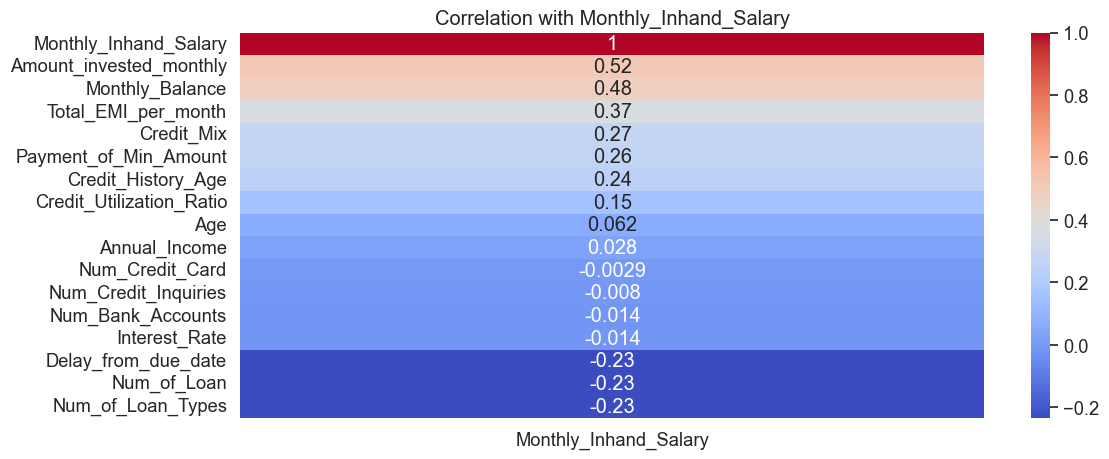

In [1019]:
corr_df = df.corr(method='pearson', numeric_only=True)[['Monthly_Inhand_Salary']].sort_values('Monthly_Inhand_Salary', ascending=False)


fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation with Monthly_Inhand_Salary")
plt.show()

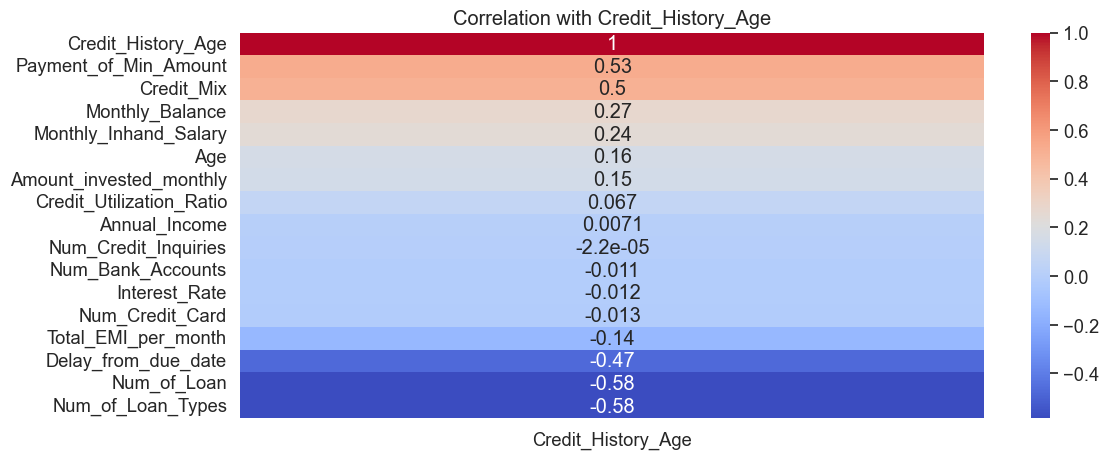

In [1022]:
corr_df = df.corr(method='pearson', numeric_only=True)[['Credit_History_Age']].sort_values('Credit_History_Age', ascending=False)


fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation with Credit_History_Age")
plt.show()

In [1017]:
# df.to_csv('v1_test.csv', index=False) # 19 Columns
# df.to_csv('v2_test.csv', index=False) # 17 columns